## Heart Disease Prediction

## OUTLINE: 

1. Reading the files
2. Missing Values
3. Imputing categorical variables
4. Imputing numerical variables
5. Classification with Decision Tree, single split
6. Classification with Decision Tree, Cross validation
7. Interpretation of the results
8. General Conclusion

In [ ]:
import types
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap

RSEED = 8

## *1.* Reading the files



The datasets contain information about adult patients from the US and from Switzerland.

In [ ]:
columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"] # you can find the column names in the file 'data/heart-disease.names'.
# Select the correct column names for the dataset, as described in the file.


cleveland = pd.DataFrame(pd.read_csv('data/cleveland.data',header = None, names=columns))  
test = pd.DataFrame(pd.read_csv('data/switzerland.data',header = None, names=columns))    

In [ ]:
cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,?,0,127.0,0.0,0.7,1,?,?,1.0
1,34.0,1.0,4.0,115.0,0.0,?,?,154.0,0.0,0.2,1,?,?,1.0
2,36.0,1.0,4.0,110.0,0.0,?,0,125.0,1.0,1.0,2,?,6,1.0
3,38.0,0.0,4.0,105.0,0.0,?,0,166.0,0.0,2.8,1,?,?,2.0
4,38.0,0.0,4.0,110.0,0.0,0,0,156.0,0.0,0.0,2,?,3,1.0


In [ ]:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,60.270627,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,77.296578,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,0.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,999.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
test.describe()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,num
count,122.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,117.000000
mean,82.409836,0.914530,3.683761,129.957265,0.0,122.299145,0.435897,0.653846,1.769231
std,170.211621,0.280782,0.702822,22.423200,0.0,25.759921,0.498007,1.056061,1.011866
min,0.000000,0.000000,1.000000,80.000000,0.0,60.000000,0.000000,-2.600000,0.000000
25%,48.500000,1.000000,4.000000,115.000000,0.0,105.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,121.000000,0.000000,0.300000,2.000000
75%,61.000000,1.000000,4.000000,145.000000,0.0,141.000000,1.000000,1.500000,3.000000
max,999.000000,1.000000,4.000000,200.000000,0.0,182.000000,1.000000,3.700000,4.000000


## *2.* Missing values

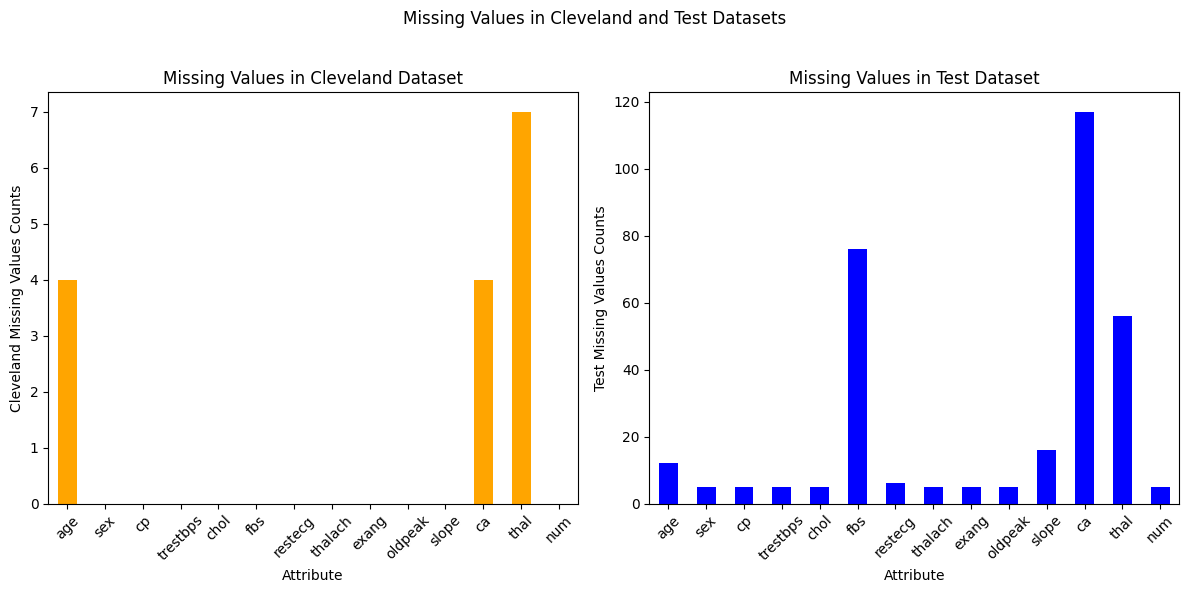

In [103]:
cleveland = cleveland.replace(["?", "!"], np.nan)
test = test.replace(["?", "!"], np.nan)

cleveland = cleveland.apply(pd.to_numeric, errors='coerce')
test = test.apply(pd.to_numeric, errors='coerce')

def replace_and_count_missing(df, conditions_dict):
    missing_values = []
    for col, condition in conditions_dict.items():
        missing_count = condition(df[col]).sum()
        missing_values.append(missing_count)
        df[col] = df[col].where(~condition(df[col]), other=np.nan)
    return missing_values

conditions_cleveland = {
    "age": lambda x: (x < 18) | (x > 120)|(x == 999), 
    "sex": lambda x: (x != 0) & (x != 1),
    "cp": lambda x: (x != 1) & (x != 2) & (x != 3) & (x != 4),
    "trestbps": lambda x: x.isna(),
    "chol": lambda x: x.isna(),
    "fbs": lambda x: (x != 0) & (x != 1),
    "restecg": lambda x: (x != 0) & (x != 1) & (x != 2),
    "thalach": lambda x: x.isna(),
    "exang": lambda x: (x != 0) & (x != 1),
    "oldpeak": lambda x: x.isna(),
    "slope": lambda x: (x != 1) & (x != 2) & (x != 3),
    "ca": lambda x: x.isna() | (x < 0) | (x > 3),
    "thal": lambda x: (x != 3) & (x != 6) & (x != 7),
    "num": lambda x: x.isna()
}

conditions_test = conditions_cleveland

cleveland_missing_values = replace_and_count_missing(cleveland, conditions_cleveland)
test_missing_values = replace_and_count_missing(test, conditions_test)

columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

cleveland_missing_values_df = pd.DataFrame({'Attribute': columns, 'Cleveland_Missing_Values_Counts': cleveland_missing_values})
test_missing_values_df = pd.DataFrame({'Attribute': columns, 'Test_Missing_Values_Counts': test_missing_values})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

cleveland_missing_values_df.set_index('Attribute').plot(kind='bar', ax=axs[0], legend=False, color='orange')
axs[0].set_title('Missing Values in Cleveland Dataset')
axs[0].set_xlabel('Attribute')
axs[0].set_ylabel('Cleveland Missing Values Counts')
axs[0].set_xticklabels(cleveland_missing_values_df['Attribute'], rotation=45)

test_missing_values_df.set_index('Attribute').plot(kind='bar', ax=axs[1], legend=False, color='blue')
axs[1].set_title('Missing Values in Test Dataset')
axs[1].set_xlabel('Attribute')
axs[1].set_ylabel('Test Missing Values Counts')
axs[1].set_xticklabels(test_missing_values_df['Attribute'], rotation=45)

plt.suptitle('Missing Values in Cleveland and Test Datasets')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## *3.* Imputing categorical variables

In [104]:
categorical_columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal']  
numerical_columns_int = ['age','trestbps','chol','thalach']      
numerical_columns_float = ['oldpeak']  


cleveland[categorical_columns] = cleveland[categorical_columns].astype('object')
test[categorical_columns] = test[categorical_columns].astype('object')

cleveland[numerical_columns_int] = cleveland[numerical_columns_int].astype('Int64')
test[numerical_columns_int] = test[numerical_columns_int].astype('Int64')

cleveland[numerical_columns_float] = cleveland[numerical_columns_float].astype('float64')
test[numerical_columns_float] = test[numerical_columns_float].astype('float64')

In [ ]:
X_cleveland = pd.DataFrame(cleveland.drop(columns=["num"], axis=1)) # change this
y_cleveland = pd.DataFrame(cleveland["num"])  # change this

X_test = pd.DataFrame(test.drop(columns=["num"],axis=1))       # change this
y_test = pd.DataFrame(test["num"])       # change this

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_cleveland, y_cleveland, test_size=0.3, shuffle=True, stratify=y_cleveland)

X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)


In [ ]:
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67,1.0,3.0,152,212,0.0,2.0,150,0.0,0.8,2.0,0.0,7.0
1,43,1.0,4.0,132,247,1.0,2.0,143,1.0,0.1,2.0,NaN,7.0
2,57,1.0,4.0,110,335,0.0,0.0,143,1.0,3.0,2.0,1.0,7.0
3,54,0.0,3.0,135,304,1.0,0.0,170,0.0,0.0,1.0,0.0,3.0
4,52,1.0,3.0,138,223,0.0,0.0,169,0.0,0.0,1.0,NaN,3.0


In [ ]:
X_val.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,58,1.0,2.0,120,284,0.0,2.0,160,0.0,1.8,2.0,0.0,3.0
1,48,1.0,4.0,130,256,1.0,2.0,150,1.0,0.0,1.0,2.0,7.0
2,58,1.0,4.0,125,300,0.0,2.0,171,0.0,0.0,1.0,2.0,7.0
3,55,1.0,2.0,130,262,0.0,0.0,155,0.0,0.0,1.0,0.0,3.0
4,51,1.0,4.0,140,298,0.0,0.0,122,1.0,4.2,2.0,3.0,7.0


In [ ]:
# To make the classification task easier, transform the target variable into a binary variable.
# If the target variable is 0, it should remain 0. If the target variable is different from 0, it should be transformed into 1.

cleveland["num"] = cleveland["num"].replace([1,2,3,4], 1)
test["num"] = test["num"].replace([1,2,3,4], 1)

y_train = pd.DataFrame((y_train != 0).astype(int))
y_val = pd.DataFrame((y_val != 0).astype(int))
y_test = pd.DataFrame((y_test != 0).astype(int))

train = pd.concat([X_train, y_train], axis = 1)
val = pd.concat([X_val, y_val], axis = 1)
test = pd.concat([X_test, y_test], axis=1)

### impute the missing values in the categorical columns. Use a KNNImputer from sklearn for the imputation process

In [ ]:

from sklearn.impute import KNNImputer

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

test = test.drop(test.index[-5:])
y_test = y_test.drop(y_test.index[-5:])
X_test = X_test.drop(X_test.index[-5:])

train_cat = X_train[categorical_columns]
val_cat = X_val[categorical_columns]
test_cat = X_test[categorical_columns]
train_cat = train_cat.apply(pd.to_numeric, errors='coerce')
val_cat = val_cat.apply(pd.to_numeric, errors='coerce')
test_cat = test_cat.apply(pd.to_numeric, errors='coerce')

# Impute the three datasets using a KNN imputer with k=5 and weights set to distance
imputer = KNNImputer(n_neighbors=5, weights='distance')

# Fit the imputer on the training set and transform all datasets
train_imputed = pd.DataFrame(imputer.fit_transform(train_cat),columns = train_cat.columns)
val_imputed =  pd.DataFrame(imputer.transform(val_cat),columns = val_cat.columns)
test_imputed = pd.DataFrame(imputer.transform(test_cat),columns = test_cat.columns)
train_imputed = train_imputed.apply(pd.to_numeric, errors='coerce')
val_imputed = val_imputed.apply(pd.to_numeric, errors='coerce')
test_imputed = test_imputed.apply(pd.to_numeric, errors='coerce')

# Approximate imputed values to the nearest original categorical values
def approximate_to_nearest(value, original_vals):
    if pd.isna(value):  # Handle NaNs if any exist
        return np.nan
    closest_val = min(original_vals, key=lambda x: (abs(value - x), -x))
    return closest_val

# Convert imputed arrays back to DataFrames
train_imputed_knn = pd.DataFrame(train_imputed, columns=train_cat.columns)
val_imputed_knn = pd.DataFrame(val_imputed, columns=val_cat.columns)
test_imputed_knn = pd.DataFrame(test_imputed, columns=test_cat.columns)

# Apply the approximation for each imputed DataFrame
for col in train_cat.columns:
    train_imputed_knn[col] = train_imputed_knn[col].apply(lambda x: approximate_to_nearest(x, factorized_original_values[col]))
    val_imputed_knn[col] = val_imputed_knn[col].apply(lambda x: approximate_to_nearest(x, factorized_original_values[col]))
    test_imputed_knn[col] = test_imputed_knn[col].apply(lambda x: approximate_to_nearest(x, factorized_original_values[col]))

# Save the results in train_imputed_knn, val_imputed_knn, and test_imputed_knn.
train_imputed_knn.to_csv('train_imputed_knn.csv', index=False)
val_imputed_knn.to_csv('val_imputed_knn.csv', index=False)
test_imputed_knn.to_csv('test_imputed_knn.csv', index=False)

## *4.* Imputing numerical variables

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import time

numerical_columns_int = ['age', 'trestbps', 'chol', 'thalach']
numerical_columns_float = ['oldpeak']
numerical_columns = numerical_columns_int + numerical_columns_float

# Create a subset of the train dataset with only the numerical columns. Call this subset train_num.
train_num = X_train[numerical_columns]

# Create a subset of the val dataset with only the numerical columns. Call this subset val_num.
val_num = X_val[numerical_columns]

# Create a subset of the test dataset with only the numerical columns. Call this subset test_num.
test_num = X_test[numerical_columns]

train_num = train_num.astype('float64')
val_num = val_num.astype('float64')
test_num = test_num.astype('float64')

# Function to perform Lasso regression imputation
def lasso_impute(data_missing, data_not_missing):
    data_imputed = data_missing.copy()
    scaler = StandardScaler()
    
    for column in data_missing.columns:
        if data_missing[column].isnull().any():
            features = data_not_missing.columns.drop(column)
            X_train_lasso = data_not_missing[features]
            y_train_lasso = data_not_missing[column]
            
            # Ensure we get valid indices for X_train and y_train
            non_null_indices = ~data_not_missing[column].isnull()
            X_train_lasso = X_train_lasso.loc[non_null_indices]
            y_train_lasso = y_train_lasso.loc[non_null_indices]
            
            # Check if X_train or y_train is empty
            if X_train_lasso.empty or y_train_lasso.empty:
                continue
            
            # Scale the features
            X_train_scaled = scaler.fit_transform(X_train_lasso)
            data_missing_scaled = scaler.transform(data_missing[features])
            
            # Lasso modeling with cross-validation to find the best alpha
            lasso_cv = LassoCV(cv=5, random_state=42)
            lasso_cv.fit(X_train_scaled, y_train_lasso)
            
            missing_indices = data_missing[column].isnull()
            data_imputed.loc[missing_indices, column] = lasso_cv.predict(data_missing_scaled[missing_indices])
    
    return data_imputed

# Initialize imputed datasets
train_num_imputed_lasso = train_num.copy()
val_num_imputed_lasso = val_num.copy()
test_num_imputed_lasso = test_num.copy()

# Iteratively impute missing values until there are no more missing values
while train_num_imputed_lasso.isnull().values.any() or val_num_imputed_lasso.isnull().values.any() or test_num_imputed_lasso.isnull().values.any():
    train_num_missing = train_num_imputed_lasso[train_num_imputed_lasso.isnull().any(axis=1)]
    train_num_not_missing = train_num_imputed_lasso[train_num_imputed_lasso.notnull().all(axis=1)]
    
    val_num_missing = val_num_imputed_lasso[val_num_imputed_lasso.isnull().any(axis=1)]
    val_num_not_missing = val_num_imputed_lasso[val_num_imputed_lasso.notnull().all(axis=1)]
    
    test_num_missing = test_num_imputed_lasso[test_num_imputed_lasso.isnull().any(axis=1)]
    test_num_not_missing = test_num_imputed_lasso[test_num_imputed_lasso.notnull().all(axis=1)]
    
    train_num_imputed_lasso.update(lasso_impute(train_num_missing, train_num_not_missing))
    val_num_imputed_lasso.update(lasso_impute(val_num_missing, val_num_not_missing))
    test_num_imputed_lasso.update(lasso_impute(test_num_missing, test_num_not_missing))

# Concatenate the imputed subsets with the subsets that did not contain missing values.
train_imputed_lasso = train_num_imputed_lasso.sort_index()
val_imputed_lasso = val_num_imputed_lasso.sort_index()
test_imputed_lasso = test_num_imputed_lasso.sort_index()

# Save the resulting datasets in train_imputed_lasso, val_imputed_lasso, and test_imputed_lasso.
train_imputed_lasso.to_csv('train_imputed_lasso.csv', index=False)
val_imputed_lasso.to_csv('val_imputed_lasso.csv', index=False)
test_imputed_lasso.to_csv('test_imputed_lasso.csv', index=False)


## *5.* Classification with Decision Tree, using a single split 

In [ ]:
# Merge the train_imputed_knn and train_imputed_lasso datasets. 
# Merge the val_imputed_knn and val_imputed_lasso datasets.
# Merge the test_imputed_knn and test_imputed_lasso datasets.

X_train_imputed = pd.DataFrame(pd.concat([train_imputed_knn.reset_index(drop=True), train_imputed_lasso.reset_index(drop=True)], axis=1))
X_val_imputed = pd.DataFrame(pd.concat([val_imputed_knn.reset_index(drop=True), val_imputed_lasso.reset_index(drop=True)], axis=1))
X_test_imputed = pd.DataFrame(pd.concat([test_imputed_knn.reset_index(drop=True), test_imputed_lasso.reset_index(drop=True)], axis=1))

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import time

hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}


performance = {}

param_grid = ParameterGrid(hyperparameters)

start = time.time() 

for params in param_grid:
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_train_imputed, y_train)
    y_val_pred = model.predict(X_val_imputed)
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    
    performance[tuple(params.items())] = f1
    
end = time.time()

print('Time elapsed to run the hyperparameter tuning with a single split: ', end - start) 

Time elapsed to run the hyperparameter tuning with a single split:  0.08795404434204102


In [177]:
# select the best performing hyperparameters
best_hyperparameters = max(performance, key=performance.get)
best_hyperparameters


(('criterion', 'gini'), ('max_depth', 7), ('min_samples_split', 2))

In [178]:
dt_best = DecisionTreeClassifier(random_state=42, **dict(best_hyperparameters))
dt_best.fit(X_train_imputed, y_train)

# Predict the target variable for the test dataset
y_test_pred = dt_best.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset
f1_test_single_split  = f1_score(y_test, y_test_pred, average='weighted')


In [ ]:
f1_test_single_split

np.float64(0.5926537693697119)

## *6.* Classification with Decision Tree using Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

X_combined = pd.concat([X_train_imputed, X_val_imputed])
y_combined = pd.concat([y_train, y_val])

hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Create a StratifiedKFold object with 5 splits,shuffle=True
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a dictionary called performance_CV to store the hyperparameter combinations and the corresponding performance of the model.
performance_CV = []

# Create a ParameterGrid object with the usual hyperparameters.
param_grid = ParameterGrid(hyperparameters)

start_CV = time.time() # DO NOT CHANGE/DELETE THIS LINE

for i, (train_index, val_index) in enumerate(CV.split(X_combined, y_combined)):
    X_train_cv, X_val_cv = X_combined.iloc[train_index], X_combined.iloc[val_index]
    y_train_cv, y_val_cv = y_combined.iloc[train_index], y_combined.iloc[val_index]
    
    for params in param_grid:
        # Create a DecisionTreeClassifier with the hyperparameters for that iteration.
        dt = DecisionTreeClassifier(random_state=42, **params)
        
        # Fit the model.
        dt.fit(X_train_cv, y_train_cv)
        
        # Predict the target variable for the validation fold.
        y_val_pred = dt.predict(X_val_cv)
        
        # Calculate the F1 score of the model.
        f1 = f1_score(y_val_cv, y_val_pred, average='weighted')  # Use weighted average for multi-class problems
        
        # Add the hyperparameters and the F1 score to the performance dictionary.
        performance_CV.append({
            'parameters': params,
            'f1_score': f1
        })

end_CV = time.time() 

print('Time elapsed to run the hyperparameter tuning with Cross Validation: ', end_CV - start_CV) 

Time elapsed to run the hyperparameter tuning with Cross Validation:  0.2715330123901367


In [181]:
# select the best performing hyperparameters, which are the ones with the highest average F1 score

best_model_CV = max(performance_CV, key=lambda x: x['f1_score'])
best_hyperparameters_CV = best_model_CV['parameters']

best_hyperparameters_CV

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [182]:
# Create a DecisionTreeClassifier with the best hyperparameters.
dt_best_CV = DecisionTreeClassifier(random_state=42, **best_hyperparameters_CV)
dt_best_CV.fit(X_combined, y_combined)

# Predict the target variable for the test dataset
y_test_pred_CV = dt_best_CV.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset
f1_test_CV = f1_score(y_test, y_test_pred_CV, average='weighted')


In [ ]:
f1_test_CV 

np.float64(0.8514523406655387)

## *7.* Interpretation of the results 

The elapsed time for training a Decision Tree using cross-validation (CV) is generally longer than a single split due to the additional computational overhead of training multiple models across different data folds. CV evaluates the model’s performance more robustly but increases the overall training time significantly.

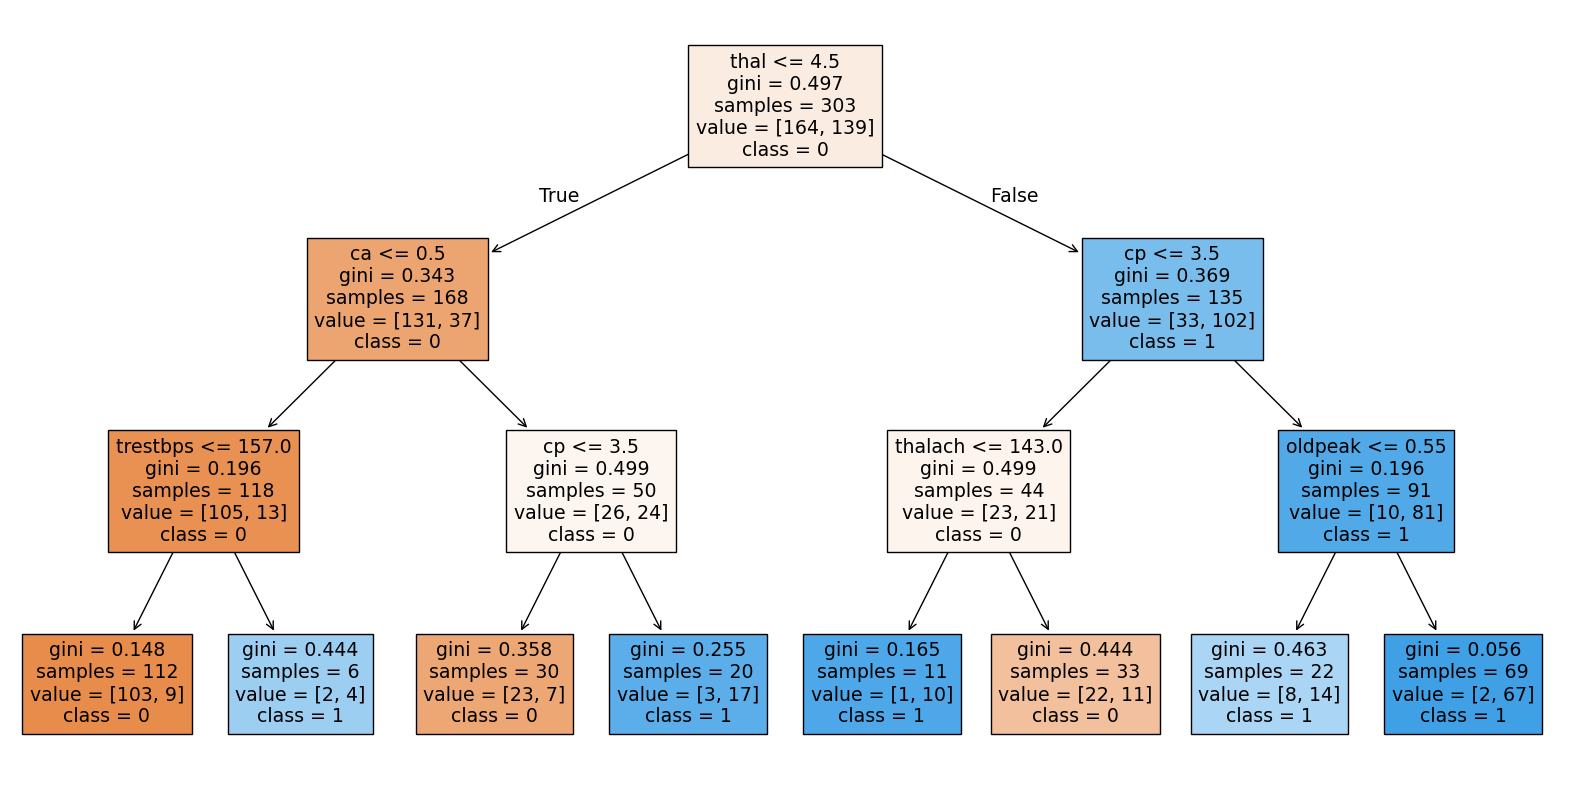

In [184]:
# plot your tree here.
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_best_CV, filled=True, feature_names=X_train_imputed.columns, class_names=[str(cls) for cls in dt_best_CV.classes_])
plt.show()

## *8.* General Conclusion

The most relevant feature is "thal", which has the highest importance scores and significantly influence the decision-making process. The second 
important features are "ca" and "cp".